In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pandas as pd

# 1. Configuration
API_KEY = 'aad4cbdae56d6d693c4f99064fe46dcd'
CITY = 'New Zealand'  # Choose a city relevant to your economic study
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric'

# 2. Fetch Data
response = requests.get(URL)
data = response.json()

if response.status_code == 200:
    print(f"Successfully fetched weather data for {CITY}!")
else:
    print(f"Error: {data.get('message', 'Could not connect')}")

Successfully fetched weather data for New Zealand!


In [2]:
# 3. Extract the "List" of weather readings
weather_list = data['list']

# 4. Flatten the data into a Pandas Table
# We extract Date, Temperature, Humidity, and Pressure
df = pd.json_normalize(weather_list)

# 5. Clean up the Column Names for easier analysis
df = df[['dt_txt', 'main.temp', 'main.humidity', 'main.pressure', 'weather']]
df.columns = ['Date', 'Temp_C', 'Humidity', 'Pressure', 'Description']

print("Preview of your Economic Dataset:")
df.head()

Preview of your Economic Dataset:


,Date,Temp_C,Humidity,Pressure,Description
0,2026-01-18 21:00:00,13.04,64,1026,"[{'id': 804, 'main': 'Clouds', 'description': ..."
1,2026-01-19 00:00:00,13.58,62,1026,"[{'id': 804, 'main': 'Clouds', 'description': ..."
2,2026-01-19 03:00:00,14.23,61,1024,"[{'id': 804, 'main': 'Clouds', 'description': ..."
3,2026-01-19 06:00:00,13.69,67,1023,"[{'id': 804, 'main': 'Clouds', 'description': ..."
4,2026-01-19 09:00:00,12.25,76,1024,"[{'id': 804, 'main': 'Clouds', 'description': ..."


In [3]:
volatility = df['Temp_C'].std()

In [4]:
print(f"Temperature Volatility: {volatility}")

Temperature Volatility: 2.2920100768338023


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# 1. Convert the 'Date' column from text to a real 'Datetime' object
df['Date'] = pd.to_datetime(df['Date'])

# 2. Resample only the numeric columns (Temperature, Humidity, Pressure)
# This prevents the "TypeError" from the 'Description' column
numeric_df = df.select_dtypes(include=['number'])
numeric_df.index = df['Date']  # Set the date as the index for resampling

weekly_avg = numeric_df.resample('W').mean()

print("WEEKLY ECONOMIC WEATHER TRENDS:")
print(weekly_avg)

WEEKLY ECONOMIC WEATHER TRENDS:
               Temp_C   Humidity     Pressure
Date                                         
2026-01-18  13.040000  64.000000  1026.000000
2026-01-25  14.094103  79.974359  1007.538462


In [7]:
# 1. Convert Date to actual time objects
df['Date'] = pd.to_datetime(df['Date'])

# 2. Select ONLY numeric columns to avoid the TypeError
numeric_cols = df.select_dtypes(include=['number'])

# 3. Add the Date back as the index so we can resample
numeric_cols.index = df['Date']

# 4. Now calculate the weekly average
weekly_avg = numeric_cols.resample('W').mean()
print(weekly_avg)

               Temp_C   Humidity     Pressure
Date                                         
2026-01-18  13.040000  64.000000  1026.000000
2026-01-25  14.094103  79.974359  1007.538462


In [8]:
# Extract the first word from the Description list
df['Condition'] = df['Description'].apply(
    lambda x: x[0]['main'] if isinstance(x, list) else x)

# Select and rename columns for the report
report = df[['Date', 'Temp_C', 'Condition']].head(15)

# Professional Styling
styled_report = report.style.set_caption("WEATHER FORECAST INTELLIGENCE REPORT").set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#1f3b64'), ('color', 'white'), ('font-family', 'Arial')]}
])

styled_report

,Date,Temp_C,Condition
0,2026-01-18 21:00:00,13.040000,Clouds
1,2026-01-19 00:00:00,13.580000,Clouds
2,2026-01-19 03:00:00,14.230000,Clouds
3,2026-01-19 06:00:00,13.690000,Clouds
4,2026-01-19 09:00:00,12.250000,Clouds
5,2026-01-19 12:00:00,11.830000,Rain
6,2026-01-19 15:00:00,10.680000,Clouds
7,2026-01-19 18:00:00,11.760000,Clouds
8,2026-01-19 21:00:00,13.460000,Clouds
9,2026-01-20 00:00:00,14.110000,Rain


In [9]:
# Extract the weather word from the messy list
df['Condition'] = df['Description'].apply(
    lambda x: x[0]['main'] if isinstance(x, list) else x)

# Show a clean version of your report
df[['Date', 'Temp_C', 'Humidity', 'Condition']].head()

,Date,Temp_C,Humidity,Condition
0,2026-01-18 21:00:00,13.04,64,Clouds
1,2026-01-19 00:00:00,13.58,62,Clouds
2,2026-01-19 03:00:00,14.23,61,Clouds
3,2026-01-19 06:00:00,13.69,67,Clouds
4,2026-01-19 09:00:00,12.25,76,Clouds


In [10]:
from scipy.stats import linregress

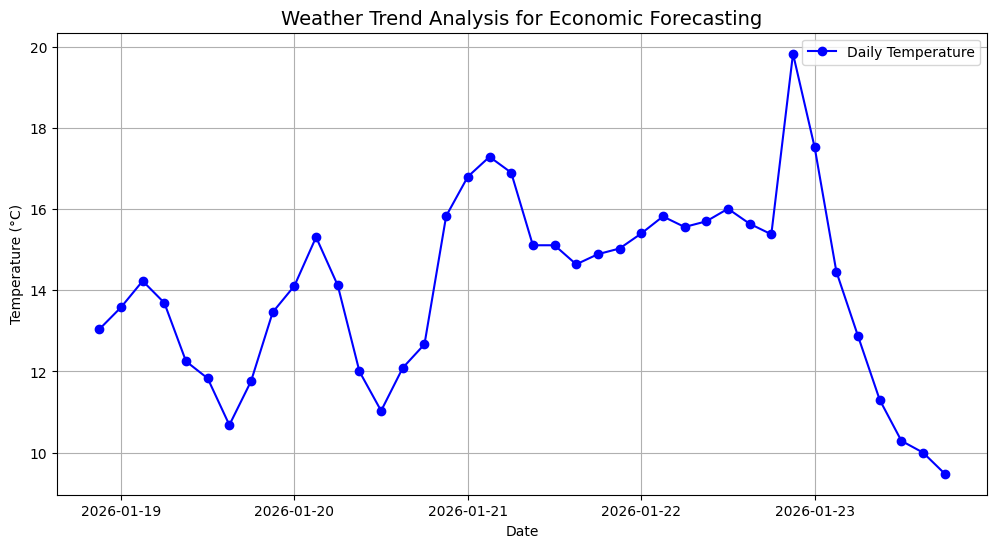

In [11]:
import matplotlib.pyplot as plt

# Plotting Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temp_C'],
         label='Daily Temperature', color='blue', marker='o')
plt.title('Weather Trend Analysis for Economic Forecasting', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
from scipy.stats import linregress
import numpy as np
df['Day_Num'] = np.arange(len(df))
slope, intercept, r, p, std_err = linregress(df['Day_Num'], df['Temp_C'])
df['Trendline'] = intercept + slope * df['Day_Num']

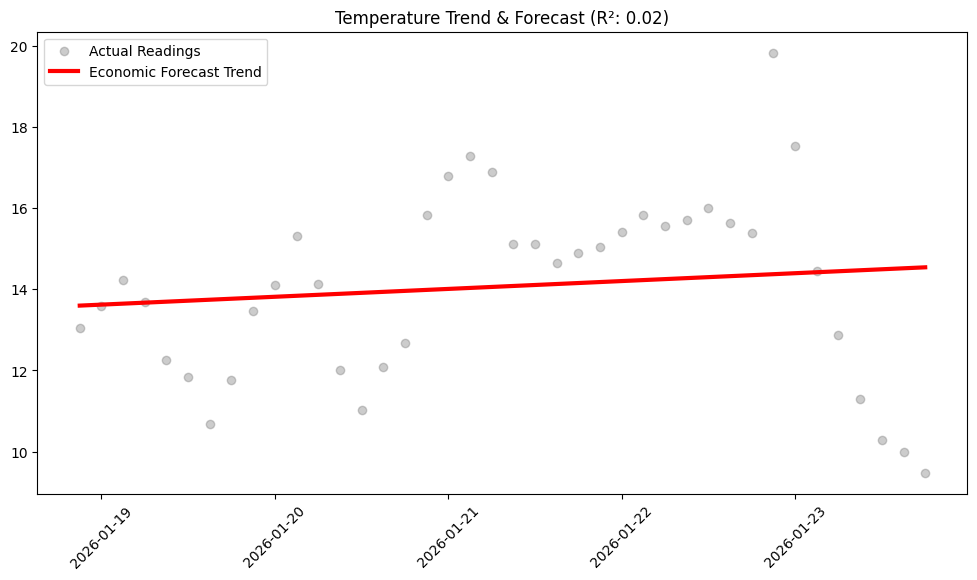

In [13]:
from scipy.stats import linregress
import numpy as np

# 1. Create the math for the trendline
df['Day_Num'] = np.arange(len(df))
slope, intercept, r, p, std_err = linregress(df['Day_Num'], df['Temp_C'])
df['Trendline'] = intercept + slope * df['Day_Num']

# 2. Now Plot everything together
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Temp_C'], color='gray',
            label='Actual Readings', alpha=0.4)
plt.plot(df['Date'], df['Trendline'], color='red',
         linewidth=3, label='Economic Forecast Trend')

plt.title(f'Temperature Trend & Forecast (R²: {r**2:.2f})')
plt.xticks(rotation=45)
plt.legend()
plt.show()